In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer explicitly
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
np.random.seed(30)
X = np.random.uniform(0, 2*np.pi, 100)
y = X+10*np.sin(X) + np.random.normal(0,5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(256, activation=LeakyReLU(alpha=0.2), input_shape=(1,)),
    Dense(128, activation=LeakyReLU(alpha=0.2)),
    Dense(64, activation=LeakyReLU(alpha=0.2)),
    Dense(32, activation=LeakyReLU(alpha=0.2)),
    Dense(16, activation=LeakyReLU(alpha=0.2)),
    Dense(8, activation=LeakyReLU(alpha=0.2)),
    Dense(4, activation=LeakyReLU(alpha=0.2)),
    Dense(2, activation=LeakyReLU(alpha=0.2)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_callback])

Epoch 1/1000
3/3 [==============================] - 2s 108ms/step - loss: 40.4928 - val_loss: 43.5537
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 40.4003 - val_loss: 43.1996
Epoch 3/1000
3/3 [==============================] - 0s 19ms/step - loss: 40.2018 - val_loss: 42.6665
Epoch 4/1000
3/3 [==============================] - 0s 18ms/step - loss: 40.0055 - val_loss: 41.9954
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 39.5920 - val_loss: 41.6761
Epoch 6/1000
3/3 [==============================] - 0s 18ms/step - loss: 39.3239 - val_loss: 41.2750
Epoch 7/1000
3/3 [==============================] - 0s 18ms/step - loss: 38.9541 - val_loss: 40.9867
Epoch 8/1000
3/3 [==============================] - 0s 18ms/step - loss: 38.5698 - val_loss: 40.0243
Epoch 9/1000
3/3 [==============================] - 0s 20ms/step - loss: 38.0372 - val_loss: 39.1897
Epoch 10/1000
3/3 [==============================] - 0s 17ms/step - loss: 37.5400 - val_lo

In [ ]:
#load model
model = tf.keras.models.load_model('/content/drive/MyDrive/Parameter_estimation/function.keras')

3/3 [==============================] - 0s 4ms/step


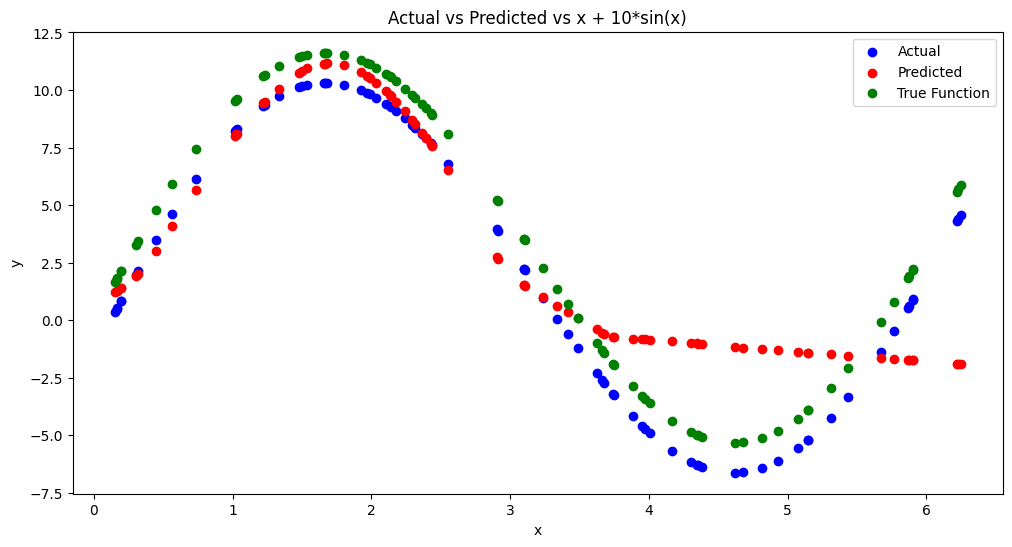

Mean Squared Error 6.266648663545567


In [ ]:
# Predict on the test data
y_pred_train = model.predict(X_train)

# Calculate the true values for the function x + 10*sin(x)
y_true_train = X_train + 10 * np.sin(X_train)

# Plot the actual vs predicted values and the true function
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_pred_train, color='red', label='Predicted')
plt.scatter(X_train, y_true_train, color='green', label='True Function')
plt.title('Actual vs Predicted vs x + 10*sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
y_pred_train=y_pred_train.reshape(-1,)
mse = np.mean((y_true_train - y_pred_train) ** 2)
print("Mean Squared Error", mse)

In [ ]:
4.051230174298745*1.96/10

0.7940411141625539

In [ ]:
np.random.seed(47)

# Generate the sequence
num_samples = 1000  # Number of samples
start_value = 0     # Starting value of the sequence
difference = 2*np.pi/1000    # Difference between adjacent values
noise_level = 5   # Standard deviation of Gaussian noise

# Generate the sequence with uniform differences
X_test = np.arange(start_value, start_value + num_samples * difference, difference)

# Generate the corresponding target values (e.g., sine function with noise)
y_test = X_test+10*np.sin(X_test) + np.random.normal(0, noise_level, num_samples)

32/32 [==============================] - 0s 1ms/step


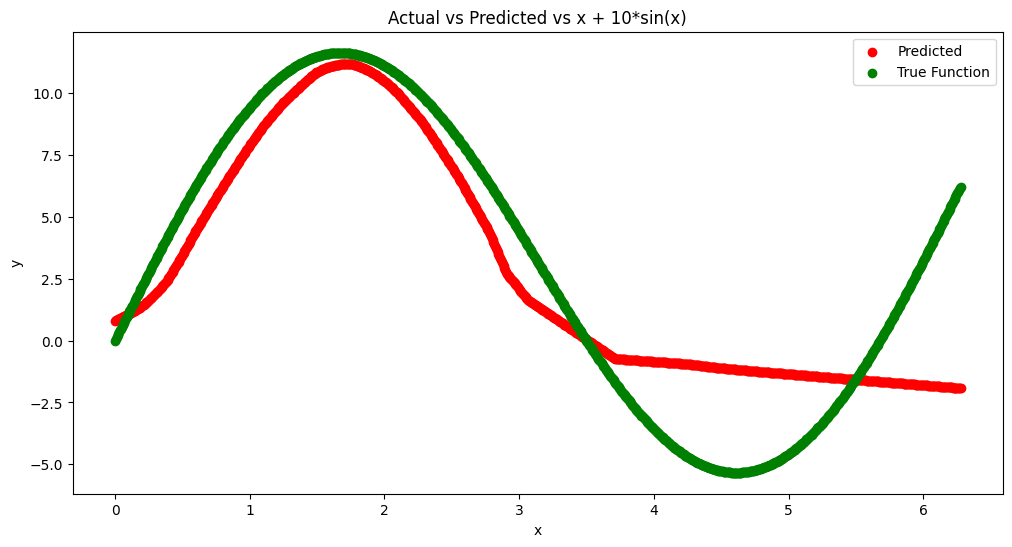

Mean Squared Error 6.449144915854142


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the true values for the function x + 10*sin(x)
y_true = X_test + 10 * np.sin(X_test)

error=np.full(1000,0.7940411141625539)
y_pred=y_pred.flatten()

# Plot the actual vs predicted values and the true function
plt.figure(figsize=(12, 6))
#plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.scatter(X_test, y_true, color='green', label='True Function')
plt.title('Actual vs Predicted vs x + 10*sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
mse = np.mean((y_true - y_pred) ** 2)
print("Mean Squared Error", mse)
model.save('function.keras')

In [ ]:
y_pred1=y_pred.reshape(-1,)
mse = np.mean((y_true - y_pred1) ** 2)
print("Mean Squared Error", mse)

Mean Squared Error 3.687226734949698


In [ ]:
y_pred

array([[ 6.64282143e-01],
       [ 6.77839756e-01],
       [ 6.91046417e-01],
       [ 7.05816567e-01],
       [ 7.25366175e-01],
       [ 7.47124016e-01],
       [ 7.69126177e-01],
       [ 7.91042268e-01],
       [ 8.12263787e-01],
       [ 8.33375752e-01],
       [ 8.53804052e-01],
       [ 8.73314559e-01],
       [ 8.94213557e-01],
       [ 9.14982617e-01],
       [ 9.35571253e-01],
       [ 9.57303166e-01],
       [ 9.79770780e-01],
       [ 1.00320315e+00],
       [ 1.02720845e+00],
       [ 1.05380058e+00],
       [ 1.08072805e+00],
       [ 1.10816920e+00],
       [ 1.13732481e+00],
       [ 1.16733778e+00],
       [ 1.19795132e+00],
       [ 1.22851264e+00],
       [ 1.25941110e+00],
       [ 1.29253709e+00],
       [ 1.33053958e+00],
       [ 1.37214100e+00],
       [ 1.41385806e+00],
       [ 1.45812321e+00],
       [ 1.50285912e+00],
       [ 1.54747427e+00],
       [ 1.59162581e+00],
       [ 1.63756120e+00],
       [ 1.68482554e+00],
       [ 1.73349941e+00],
       [ 1.7